In [117]:
#Import Libraries
# Data handling and manipulation
import pandas as pd        # For working with tabular data (DataFrames)
import numpy as np         # For numerical operations, arrays, and matrices

# Data visualization
import seaborn as sns      # For advanced statistical plotting
import matplotlib.pyplot as plt  # For creating standard plots and visualizations

# Model persistence
import pickle              # For saving/loading Python objects (e.g., trained models)

# Machine learning algorithms
from sklearn.neighbors import NearestNeighbors  # For finding closest data points (KNN-style)
from sklearn.preprocessing import StandardScaler  # For normalizing features to a standard scale

# Text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text to numerical TF-IDF features

# Sparse matrix operations
from scipy.sparse import hstack, csr_matrix  # For efficiently storing and combining large sparse matrices

In [118]:
#Import the Dataset
data = pd.read_csv("Book_Recommend_Dataset.csv")

In [119]:
#Load the Dataset
data.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [120]:
#Check the Info Of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

In [121]:
#Check the Shape of Dataset
data.shape

(133102, 16)

In [122]:
#Remove Unsed Columns
data = data[['title','author','soldBy','publishedDate','imgUrl']]

In [123]:
#Load new Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   title          133102 non-null  object
 1   author         132677 non-null  object
 2   soldBy         123869 non-null  object
 3   publishedDate  84086 non-null   object
 4   imgUrl         133102 non-null  object
dtypes: object(5)
memory usage: 5.1+ MB


In [124]:
#Check the Empty Values
data.isnull().sum()

title                0
author             425
soldBy            9233
publishedDate    49016
imgUrl               0
dtype: int64

In [125]:
#Remove the Empty values
data.dropna(subset=['author'],inplace=True)
#Remove the Empty values
data.dropna(subset=['soldBy'],inplace=True)
#Remove the Empty values
data.dropna(subset=['publishedDate'],inplace=True)

In [126]:
data.isnull().sum()

title            0
author           0
soldBy           0
publishedDate    0
imgUrl           0
dtype: int64

In [127]:
#Remove the Duplicate Values
data.drop_duplicates(subset=['author'],inplace=True)
#Remove the Duplicate Values
data.drop_duplicates(subset=['soldBy'],inplace=True)
#Remove the Duplicate Values
data.drop_duplicates(subset=['publishedDate'],inplace=True)

In [128]:
#Check the Status Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 100696
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          35 non-null     object
 1   author         35 non-null     object
 2   soldBy         35 non-null     object
 3   publishedDate  35 non-null     object
 4   imgUrl         35 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


In [129]:
#Check the columns data status
data.author.unique()

array(['Lindsay C. Gibson', 'Arthur C. Brooks', 'Becky Kennedy',
       'John Gottman', 'Jeannette Walls', 'Oprah Winfrey',
       'Robert F. Kennedy Jr.', 'David Sedaris', 'Justin Whitmel Earley',
       'L. M. Montgomery', 'Maria Tatar', 'Amanda Montei',
       'Teresa M. McDevitt', 'Belinda Daughrity', 'Mitch Weiss',
       'Rachel Marks', 'Kasey Edwards', 'Michelle Mitchell',
       'Roberta M. Berns', 'Kris Bordessa', 'Fletcher McKenzie',
       'Mark Millhone', 'Gerald J. Alred', 'Travis Campbell',
       'Ali Amrabet', 'Inès de La Fressange', 'Professor Braam van Wyk',
       'Dan Abnett', 'Jill Leovy', 'Sarah Albee', 'Bokuto Uno',
       'Matt Perman', 'Nicolas Bourriaud',
       'Harry Potter Theatrical Productions', 'Matt Forbeck'],
      dtype=object)

In [130]:
#Check the columns data status
data.soldBy.unique()

array(['Amazon.com Services LLC', 'Penguin Group (USA) LLC',
       'HarperCollins Publishers', 'Random House LLC',
       'Simon and Schuster Digital Sales Inc', 'Macmillan',
       'Simon & Schuster Digital Sales Inc.', 'Hachette Book Group',
       'HarperCollins Publishing', 'De Marque', 'W. W. Norton & Company',
       'Penguin Random House Publisher Services',
       'Pearson Education,Inc.', 'JOHN WILEY AND SONS INC',
       'Harlequin Digital Sales Corp.', 'PRH UK', 'RH AU',
       'Penguin Random House Australia Pty Ltd', 'Cengage Learning',
       'Disney Book Group', 'Random House NZ', 'Amazon.com',
       'Macmillan Higher Education', 'EDIGITA', 'Gallimard Lt.',
       'Flammarion Lt.', 'Random House ZA', 'Games Workshop',
       'Amazon Digital Services LLC HN', 'Scholastic Trade Publisher',
       'Yen Press LLC', 'Amazon Digital Services LLC MK',
       'Immat&eacute;riel fr', 'Pottermore', 'Marvel Entertainment US'],
      dtype=object)

In [131]:
#Check the columns data status
data.title.unique()

array(['Adult Children of Emotionally Immature Parents: How to Heal from Distant, Rejecting, or Self-Involved Parents',
       'From Strength to Strength: Finding Success, Happiness, and Deep Purpose in the Second Half of Life',
       'Good Inside: A Guide to Becoming the Parent You Want to Be',
       "The Seven Principles for Making Marriage Work: A Practical Guide from the Country's Foremost Relationship Expert",
       'The Glass Castle: A Memoir',
       'What Happened to You?: Conversations on Trauma, Resilience, and Healing',
       'Vax-Unvax: Let the Science Speak (Children’s Health Defense)',
       'Happy-Go-Lucky',
       'Habits of the Household: Practicing the Story of God in Everyday Family Rhythms',
       'Anne Of Green Gables Complete 8 Book Set',
       'The Classic Fairy Tales (Second Edition) (Norton Critical Editions)',
       'Touched Out: Motherhood, Misogyny, Consent, and Control',
       'Child Development and Education',
       'Autism Spectrum Disorders fro

In [132]:
#Check the columns data status
data.publishedDate.unique()

array(['2015-06-01', '2022-02-15', '2022-09-13', '2015-05-05',
       '2005-03-01', '2021-04-27', '2023-08-29', '2022-05-31',
       '2021-11-09', '2023-09-25', '2017-01-20', '2023-09-12',
       '2019-03-01', '2022-11-22', '2020-02-18', '2020-02-06',
       '2021-02-02', '2023-02-28', '2015-01-01', '2020-04-28',
       '2023-08-01', '2008-07-07', '2017-02-16', '2022-02-10',
       '2023-05-26', '2017-04-05', '2013-08-06', '2019-07-20',
       '2015-01-27', '2020-11-10', '2023-09-19', '2014-03-04',
       '2022-09-09', '2019-10-31', '2023-08-02'], dtype=object)

In [133]:
# Assuming your data is in a DataFrame called 'data'
# Extract year from 'publishedDate' column
data['year'] = pd.to_datetime(data['publishedDate']).dt.year

# Display the unique years
unique_years = data['year'].unique()
print(unique_years)

[2015 2022 2005 2021 2023 2017 2019 2020 2008 2013 2014]


In [134]:
#Check the Status Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 100696
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          35 non-null     object
 1   author         35 non-null     object
 2   soldBy         35 non-null     object
 3   publishedDate  35 non-null     object
 4   imgUrl         35 non-null     object
 5   year           35 non-null     int32 
dtypes: int32(1), object(5)
memory usage: 1.8+ KB


In [135]:
#Combination of colums
data['text'] = data['title'] + data['author'] + data['soldBy']

In [136]:
#Reload the Dataset
data.head()

,title,author,soldBy,publishedDate,imgUrl,year,text
0,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,2015-06-01,https://m.media-amazon.com/images/I/713KZTsaYp...,2015,Adult Children of Emotionally Immature Parents...
1,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,2022-02-15,https://m.media-amazon.com/images/I/A1LZcJFs9E...,2022,"From Strength to Strength: Finding Success, Ha..."
2,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,2022-09-13,https://m.media-amazon.com/images/I/71RIWM0sv6...,2022,Good Inside: A Guide to Becoming the Parent Yo...
4,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,2015-05-05,https://m.media-amazon.com/images/I/813o4WOs+w...,2015,The Seven Principles for Making Marriage Work:...
5,The Glass Castle: A Memoir,Jeannette Walls,Simon and Schuster Digital Sales Inc,2005-03-01,https://m.media-amazon.com/images/I/71td5GDUZM...,2005,The Glass Castle: A MemoirJeannette WallsSimon...


## Feature Engineering

In [137]:
# Create an instance of TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['text'])

In [138]:
#Load the instance of TfidfVectorizer data
print(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 326 stored elements and shape (35, 280)>
  Coords	Values
  (0, 2)	0.2726574558657834
  (0, 40)	0.24424035547049835
  (0, 77)	0.2726574558657834
  (0, 116)	0.2726574558657834
  (0, 169)	0.2726574558657834
  (0, 109)	0.2726574558657834
  (0, 66)	0.2726574558657834
  (0, 195)	0.2726574558657834
  (0, 215)	0.24424035547049835
  (0, 120)	0.2726574558657834
  (0, 170)	0.2726574558657834
  (0, 93)	0.2726574558657834
  (0, 42)	0.24424035547049835
  (0, 216)	0.20843904299068355
  (0, 136)	0.18485732131578073
  (1, 136)	0.17617116950038733
  (1, 231)	0.5196914304608042
  (1, 85)	0.2598457152304021
  (1, 233)	0.2598457152304021
  (1, 106)	0.2598457152304021
  (1, 58)	0.2598457152304021
  (1, 190)	0.2598457152304021
  (1, 213)	0.21354902789532434
  (1, 104)	0.2598457152304021
  (1, 131)	0.2598457152304021
  :	:
  (32, 28)	0.408248290463863
  (32, 69)	0.408248290463863
  (32, 201)	0.408248290463863
  (32, 88)	0.408248290463863
  (33, 39)

In [139]:
#Load the instance of TfidfVectorizer data data range
print(tfidf_matrix.min())

0.0


In [140]:
#Load the instance of TfidfVectorizer data data range
print(tfidf_matrix.max())

0.5408289140152339


In [141]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply the scaler to the 'year' column in the DataFrame 'data'
# This will standardize the values by removing the mean and scaling to unit variance
year_scaled = scaler.fit_transform(data[['year']])

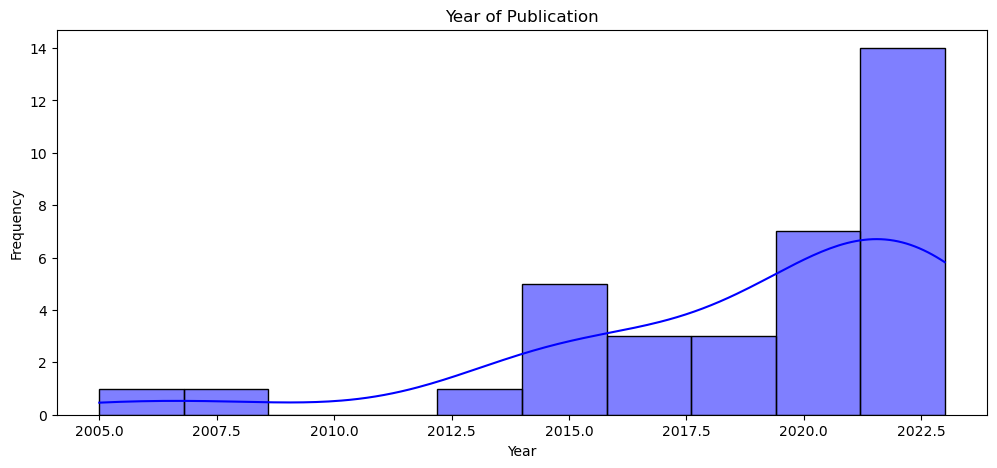

Text(0, 0.5, 'Frequency')

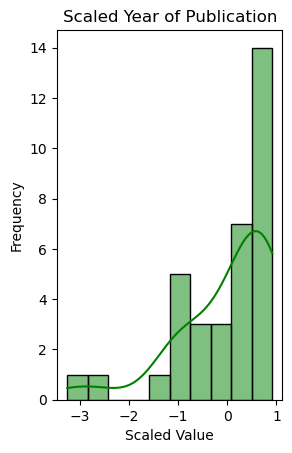

In [142]:
# Import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with a size of 12x6 inches
plt.figure(figsize=(12, 5))

# Plot a histogram of the original 'year' data with a KDE (kernel density estimate)
# 'bins=10' sets the number of bins, 'color' sets the histogram color
sns.histplot(data['year'], kde=True, bins=10, color='blue')

# Add a title and axis labels for the original year plot
plt.title('Year of Publication')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Create a subplot (1 row, 2 columns, 2nd plot) for the scaled data histogram
plt.subplot(1, 2, 2)

# Plot a histogram of the scaled 'year' data (flattened from 2D to 1D array)
sns.histplot(year_scaled.flatten(), kde=True, bins=10, color='green')

# Add a title and axis labels for the scaled year plot
plt.title('Scaled Year of Publication')
plt.xlabel('Scaled Value')
plt.ylabel('Frequency')


In [143]:
#scaled year values:
year_scaled

array([[-0.94008818],
       [ 0.68189494],
       [ 0.68189494],
       [-0.94008818],
       [-3.25720692],
       [ 0.45018307],
       [ 0.91360682],
       [ 0.68189494],
       [ 0.45018307],
       [ 0.91360682],
       [-0.47666443],
       [ 0.91360682],
       [-0.01324068],
       [ 0.68189494],
       [ 0.2184712 ],
       [ 0.2184712 ],
       [ 0.45018307],
       [ 0.91360682],
       [-0.94008818],
       [ 0.2184712 ],
       [ 0.91360682],
       [-2.5620713 ],
       [-0.47666443],
       [ 0.68189494],
       [ 0.91360682],
       [-0.47666443],
       [-1.40351192],
       [-0.01324068],
       [-0.94008818],
       [ 0.2184712 ],
       [ 0.91360682],
       [-1.17180005],
       [ 0.68189494],
       [-0.01324068],
       [ 0.91360682]])

In [144]:
#tfidf_matrix Status
(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 326 stored elements and shape (35, 280)>

In [145]:
# Convert the dense NumPy array 'year_scaled' into a sparse matrix format
# CSR (Compressed Sparse Row) format is efficient for storing and processing matrices
# that contain a lot of zeros. It saves memory by only storing non-zero values.
year_sparse =  csr_matrix(year_scaled)

In [146]:
#Combine the tfidf_matrix,year_sparse
combined_features = hstack([tfidf_matrix,year_sparse])

In [147]:
#Load the combined_features
print(combined_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 361 stored elements and shape (35, 281)>
  Coords	Values
  (0, 2)	0.2726574558657834
  (0, 40)	0.24424035547049835
  (0, 42)	0.24424035547049835
  (0, 66)	0.2726574558657834
  (0, 77)	0.2726574558657834
  (0, 93)	0.2726574558657834
  (0, 109)	0.2726574558657834
  (0, 116)	0.2726574558657834
  (0, 120)	0.2726574558657834
  (0, 136)	0.18485732131578073
  (0, 169)	0.2726574558657834
  (0, 170)	0.2726574558657834
  (0, 195)	0.2726574558657834
  (0, 215)	0.24424035547049835
  (0, 216)	0.20843904299068355
  (0, 280)	-0.9400881758649856
  (1, 31)	0.2598457152304021
  (1, 58)	0.2598457152304021
  (1, 85)	0.2598457152304021
  (1, 101)	0.21354902789532434
  (1, 104)	0.2598457152304021
  (1, 106)	0.2598457152304021
  (1, 131)	0.2598457152304021
  (1, 136)	0.17617116950038733
  (1, 190)	0.2598457152304021
  :	:
  (32, 201)	0.408248290463863
  (32, 280)	0.6818949444654162
  (33, 21)	0.26103873534358435
  (33, 39)	0.21452948772397204
  (3

In [148]:
# Define the range of 'k' values to test for the number of neighbors in the model
k_values = range(2,11)  # from 2 to 10 inclusive

# Initialize an empty list to store performance scores for each k
performance_scores = []

# Loop over each value of k to train and evaluate a NearestNeighbors model
for k in k_values:
    # Create a NearestNeighbors model that finds 'k' nearest neighbors using cosine similarity
    model = NearestNeighbors(n_neighbors=k, metric='cosine')
    
    # Fit the model on the combined_features dataset (your feature matrix)
    model.fit(combined_features)
    distance, _ = model.kneighbors(combined_features[:5])
    avg = np.mean(distance)
    performance_scores.append(avg)

In [149]:
#Check performance_scores
performance_scores

[np.float64(0.1979384511737771),
 np.float64(0.2765325671685719),
 np.float64(0.3241005130098504),
 np.float64(0.358103526927448),
 np.float64(0.3840755527249175),
 np.float64(0.40374973528372454),
 np.float64(0.41945420080081625),
 np.float64(0.44483112246105594),
 np.float64(0.46544357283107957)]

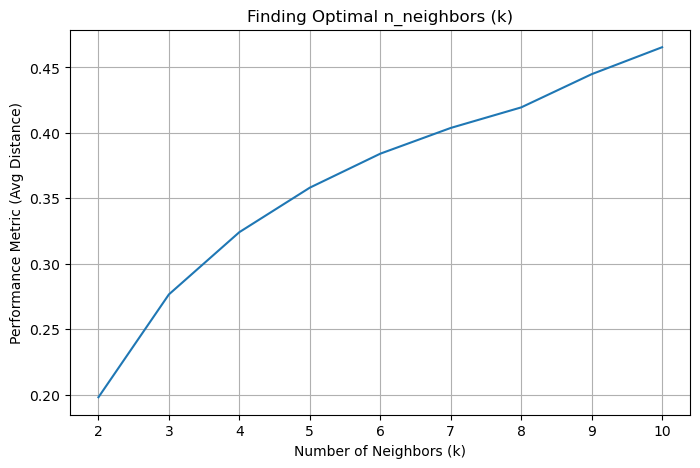

In [150]:
# Plot performance scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, performance_scores)
plt.title("Finding Optimal n_neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Performance Metric (Avg Distance)")
plt.grid()
plt.show()

In [151]:
#Train the Model
model = NearestNeighbors(n_neighbors=6, metric='cosine')
model.fit(combined_features)

,n_neighbors,6
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [152]:
#Save the Model
pickle.dump(model,open('knn_model.pickle','wb'))
pickle.dump(tfidf,open('tfidf.pickle','wb'))
pickle.dump(scaler,open('scaler.pickle','wb'))
data.topickle("")